In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from PIL import Image

In [4]:
train_path = 'E:/Final Year project/Classification model/DATASET/DATASET/TRAIN'
test_path = 'E:/Final Year project/Classification model/DATASET/DATASET/TEST'
IMG_BREDTH = 30
IMG_HEIGHT = 60
num_classes = 2

In [5]:
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=45, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 horizontal_flip=True, 
                                 vertical_flip=False).flow_from_directory(train_path, 
                                                                          target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                                          classes=['O', 'R'], 
                                                                          batch_size=100)

test_batch = ImageDataGenerator().flow_from_directory(test_path, 
                                                      target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                      classes=['O', 'R'], 
                                                      batch_size=100)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [12]:
def cnn_model():
    
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_BREDTH,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
              
    return model

def use_model(path):
    
#     model = load_model('best_waste_classifier.h5')
#     pic = plt.imread(path)
#     pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
#     pic = np.expand_dims(pic, axis=0)
#     classes = model.predict_classes(pic)
    
#     code using PIL
    model = load_model('best_waste_classifier.h5')
    pic1 = plt.imread(path)
    pic = Image.open(path).resize((IMG_BREDTH, IMG_HEIGHT))
    plt.imshow(pic1)
    if model.predict_classes(np.expand_dims(pic, axis=0)) == 0:
        classes = 'ORGANIC'
    elif model.predict_classes(np.expand_dims(pic, axis=0)) == 1:
        classes = 'RECYCLABLE'
    
    return classes

In [13]:
model = cnn_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 28, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 11, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 9, 64)        

In [14]:
checkpoint = ModelCheckpoint('best_waste_classifier.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='auto')

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy'])

In [15]:
# run code to train the neural network

model = model.fit_generator(train_batch,  
                            validation_data=test_batch,  
                            epochs=100, 
                            verbose=1, 
                            callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
226/226 [==============================] - 1165s 5s/step - loss: 0.7401 - accuracy: 0.7225 - val_loss: 0.3574 - val_accuracy: 0.8655
Epoch 2/100
226/226 [==============================] - 153s 677ms/step - loss: 0.4675 - accuracy: 0.7876 - val_loss: 0.3284 - val_accuracy: 0.8711
Epoch 3/100
226/226 [==============================] - 159s 704ms/step - loss: 0.4463 - accuracy: 0.7997 - val_loss: 0.3360 - val_accuracy: 0.8699
Epoch 4/100
226/226 [==============================] - 160s 708ms/step - loss: 0.4392 - accuracy: 0.8042 - val_loss: 0.3183 - val_accuracy: 0.8750
Epoch 5/100
226/226 [==============================] - 159s 703ms/step - loss: 0.4286 - accuracy: 0.8084 - val_loss: 0.3601 - val_accuracy: 0.8516
Epoch 6/100
226/226 [==============================] - 161s 714ms/step - loss: 0.4194 - accuracy: 0.8152 - val_loss: 0.3876 - val_accuracy: 0.8488
Epoch 7/100
226/226 [=======================

Epoch 55/100
226/226 [==============================] - 157s 696ms/step - loss: 0.3221 - accuracy: 0.8653 - val_loss: 0.3035 - val_accuracy: 0.8747
Epoch 56/100
226/226 [==============================] - 157s 694ms/step - loss: 0.3206 - accuracy: 0.8685 - val_loss: 0.2976 - val_accuracy: 0.8798
Epoch 57/100
226/226 [==============================] - 158s 697ms/step - loss: 0.3169 - accuracy: 0.8698 - val_loss: 0.3355 - val_accuracy: 0.8699
Epoch 58/100
226/226 [==============================] - 157s 696ms/step - loss: 0.3186 - accuracy: 0.8707 - val_loss: 0.3229 - val_accuracy: 0.8770
Epoch 59/100
226/226 [==============================] - 157s 697ms/step - loss: 0.3227 - accuracy: 0.8656 - val_loss: 0.2884 - val_accuracy: 0.8969
Epoch 60/100
226/226 [==============================] - 157s 695ms/step - loss: 0.3201 - accuracy: 0.8677 - val_loss: 0.2955 - val_accuracy: 0.8965
Epoch 61/100
226/226 [==============================] - 157s 695ms/step - loss: 0.3194 - accuracy: 0.8672 - val_

RECYCLABLE


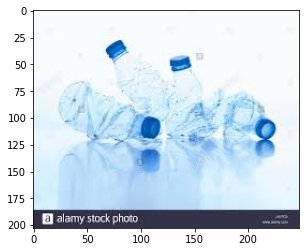

In [16]:
answer = use_model('E:/Final Year project/Images/R_22.jpg')
print(answer)

In [10]:
if answer == [0]:
    print("organic")
else:
    print("recyclable")

recyclable
